In [1]:
import pandas as pd

In [2]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data=pd.read_excel("data.xlsx")

In [4]:
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),No,No,3,4.1,Green,Very Good,1498
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),No,No,3,4.6,Dark Green,Excellent,873
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),No,No,3,4.9,Dark Green,Excellent,605
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),No,No,3,4.2,Green,Very Good,395
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),No,No,3,4.3,Green,Very Good,243


In [5]:
#Loading second data set
cc=pd.read_excel("Countrycode.xlsx")

In [6]:
#merging the data
df=pd.merge(data,cc,on= 'Country Code', how="left")

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9551 entries, 0 to 9550
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9550 non-null   object 
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   object 
 4   Address               9551 non-null   object 
 5   Locality              9551 non-null   object 
 6   Locality Verbose      9551 non-null   object 
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   object 
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   object 
 12  Has Table booking     9551 non-null   object 
 13  Has Online delivery   9551 non-null   object 
 14  Price range           9551 non-null   int64  
 15  Aggregate rating     

In [8]:
#Checking for null values
df.isnull().sum()

Restaurant ID           0
Restaurant Name         1
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [9]:
#DRopping the null values
df=df.dropna().reset_index(drop=True)

In [10]:
df.isnull().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                0
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

In [11]:
#Identifying duplicates
duplicate = df[df.duplicated()]
duplicate

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,Average Cost for two,Currency,Has Table booking,Has Online delivery,Price range,Aggregate rating,Rating color,Rating text,Votes,Country


There are no duplicates

In [12]:
#Replacing spaces in cloumn names with _
df.columns = df.columns.str.replace(' ','_')
df.columns

Index(['Restaurant_ID', 'Restaurant_Name', 'Country_Code', 'City', 'Address',
       'Locality', 'Locality_Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average_Cost_for_two', 'Currency', 'Has_Table_booking',
       'Has_Online_delivery', 'Price_range', 'Aggregate_rating',
       'Rating_color', 'Rating_text', 'Votes', 'Country'],
      dtype='object')

# EDA

In [13]:
#Identify the cities with the maximum and minimum number of restaurants

In [14]:
city_dist=df.groupby("City").agg(Count=("Restaurant_Name", 'count'))
city_dist.sort_values(by= 'Count',ascending=False)

,Count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251
Ghaziabad,25
...,...
Penola,1
Phillip Island,1
Potrero,1


In [15]:
max_cnt = city_dist[city_dist['Count']>25]
max_cnt.sort_values(by="Count", ascending=False)

,Count
City,
New Delhi,5473
Gurgaon,1118
Noida,1080
Faridabad,251


Above are the cities with more number of restaurants

In [16]:
min_cnt = city_dist[city_dist['Count']==1]
min_cnt

,Count
City,
Armidale,1
Balingup,1
Bandung,1
Beechworth,1
Chatham-Kent,1
Clatskanie,1
Cochrane,1
Consort,1
Dicky Beach,1


Above 45 cities have minimum number of restaurants

 # Franchise with most national presence

In [17]:
franchise = df.groupby(['Restaurant_Name']).agg( Count = ('City','count')).reset_index()
franchise

,Restaurant_Name,Count
0,12212,1
1,Let's Burrrp,1
2,#45,1
3,#Dilliwaala6,1
4,#InstaFreeze,1
...,...,...
7431,t Lounge by Dilmah,1
7432,tashas,1
7433,wagamama,1
7434,{Niche} - Cafe & Bar,1


In [18]:
x = franchise.sort_values(by = 'Count',ascending=False)
x[x["Count"]>20]

,Restaurant_Name,Count
1098,Cafe Coffee Day,83
2096,Domino's Pizza,79
6097,Subway,63
2713,Green Chick Chop,51
4069,McDonald's,48
3472,Keventers,34
4952,Pizza Hut,30
2616,Giani,29
680,Baskin Robbins,28
663,Barbeque Nation,26


Cafe coffee Day has the most national presence with 83 outlets & Domino's pizza has second most national presence with 79 outlets 

In [19]:
df2=df.copy()

In [20]:
#Converting the data
col=['Has_Table_booking','Has_Online_delivery']
df2=pd.get_dummies(df2,columns=col, drop_first=True)
df2.head()
# 0 indicates No
# 1 indicates yes

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,Average_Cost_for_two,Currency,Price_range,Aggregate_rating,Rating_color,Rating_text,Votes,Country,Has_Table_booking_Yes,Has_Online_delivery_Yes
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",800000,Indonesian Rupiah(IDR),3,4.1,Green,Very Good,1498,Indonesia,0,0
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",800000,Indonesian Rupiah(IDR),3,4.6,Dark Green,Excellent,873,Indonesia,0,0
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",500000,Indonesian Rupiah(IDR),3,4.9,Dark Green,Excellent,605,Indonesia,0,0
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,450000,Indonesian Rupiah(IDR),3,4.2,Green,Very Good,395,Indonesia,0,0
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",350000,Indonesian Rupiah(IDR),3,4.3,Green,Very Good,243,Indonesia,0,0


# Table Booking vs No table booking

In [21]:
tab_booking=df2[df2["Has_Table_booking_Yes"]== 0]["Restaurant_ID"].count()
tab_booking2= df2[df2["Has_Table_booking_Yes"]== 1]["Restaurant_ID"].count()

print('Ratio between restaurants that allow table booking vs. those that do not allow table booking: ', tab_booking2/tab_booking)

Ratio between restaurants that allow table booking vs. those that do not allow table booking:  0.13813670523678873


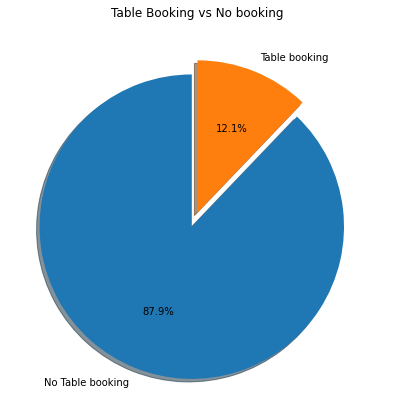

In [22]:
#pie chart to show % of Restaurants having Table booking vs those which have no table booking
y=[tab_booking, tab_booking2]
labels=('No Table booking',"Table booking")
fig1, ax = plt.subplots(figsize =(9,7))
explode = (0.1, 0)
plt.pie(y, labels = labels,explode=explode,shadow=True,autopct='%1.1f%%',startangle = 90)
ax.set_title("Table Booking vs No booking")
plt.show()

# Percentage of restaurants providing online delivery

In [23]:
onli_delivery= df2[df2["Has_Online_delivery_Yes"]== 1]["Restaurant_ID"].count()
tot_rest=df2["Restaurant_ID"].count()
onl_delivery_pc= round((onli_delivery/tot_rest)*100,2)
onl_delivery_pc




25.69

# Online Delivery Vs No Online Delivery

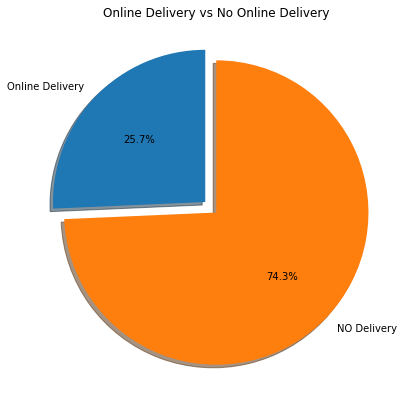

In [24]:
#pie chart to show percentage of restaurants allowing online delivery vs those which do not
no_delivery=df2[df2["Has_Online_delivery_Yes"]== 0]["Restaurant_ID"].count()
y=[onli_delivery, no_delivery]
labels=('Online Delivery',"NO Delivery")
fig1, ax = plt.subplots(figsize =(9,7))
explode = (0.1, 0)
plt.pie(y, labels = labels,explode=explode,shadow=True,autopct='%1.1f%%',startangle = 90)
ax.set_title("Online Delivery vs No Online Delivery")
plt.show()

25.69% of Restaurants provide online delivery option.

# Comparing the votes of restaurants that deliver & dont deliver

In [25]:
res_delivery= df2[df2["Has_Online_delivery_Yes"]== 1]["Votes"].sum()
res_nodelivery=df2[df2["Has_Online_delivery_Yes"]== 0]["Votes"].sum()
print(res_nodelivery,res_delivery)
print("The difference in votes for the restaurants that deliver and the restaurants that do not deliver is :", abs(res_delivery-res_nodelivery))

977236 517914
The difference in votes for the restaurants that deliver and the restaurants that do not deliver is : 459322


# MAximum & minimum number of cuisines that a restaurant serves

In [26]:
resta_cuisines = df.groupby(['Restaurant_Name','Cuisines']).agg( Rest_Count = ('Restaurant_Name','count')).reset_index()
resta_cuisines['Cuisines'] = resta_cuisines['Cuisines'].str.split(',')
resta_cuisines['Cuisines_Count'] = resta_cuisines['Cuisines'].apply(lambda x : len(x))
resta_cuisines=resta_cuisines.sort_values(by='Cuisines_Count', ascending=False)
resta_cuisines

,Restaurant_Name,Cuisines,Rest_Count,Cuisines_Count
4309,Marble,"[Continental, South African, Beverages, Des...",1,8
5527,R' ADDA,"[Street Food, Burger, Desserts, Italian, P...",1,8
3113,Healthy Food Station,"[Salad, Healthy Food, Burger, Italian, Con...",1,8
920,Bikanervala,"[North Indian, South Indian, Fast Food, Str...",8,8
3372,Indian Summer Cafe,"[Continental, Cafe, Italian, Pizza, North ...",1,8
...,...,...,...,...
3873,Kumar Pav Bhaji Corner,[Fast Food],1,1
3874,Kumar Samose Wala,[Street Food],1,1
3877,Kunal Dhaba,[North Indian],1,1
3878,Kunzum Travel Cafe,[Cafe],1,1


Max number of cuisines is 8 & minimum number of cuisine is 1

# which is the most served cuisine across the restaurant for each city?



In [27]:

city_cuisines=df.groupby(['City', "Cuisines"]).agg( Count = ('Cuisines','count')).reset_index()
city_cuisines = city_cuisines.sort_values(by = 'Count', ascending = False).reset_index(drop=True)
city_cuisines.head(15)

,City,Cuisines,Count
0,New Delhi,North Indian,658
1,New Delhi,"North Indian, Chinese",284
2,New Delhi,Fast Food,242
3,New Delhi,Chinese,228
4,New Delhi,"North Indian, Mughlai",207
5,New Delhi,Cafe,158
6,New Delhi,Street Food,123
7,New Delhi,Bakery,122
8,New Delhi,"North Indian, Mughlai, Chinese",120
9,New Delhi,"Bakery, Desserts",117


North Indian is the most served cuisine in Delhi.Similarly North Indian is the most served cuisine in Noida & Gurgaon

In [28]:
cuisines = df['Cuisines'].apply(lambda x:pd.Series(str(x).split(',')))
cuisines.columns = ['Cuisines_1','Cuisines_2','Cuisines_3','Cuisines_4','Cuisines_5','Cuisines_6','Cuisines_7','Cuisines_8']
cuisines


,Cuisines_1,Cuisines_2,Cuisines_3,Cuisines_4,Cuisines_5,Cuisines_6,Cuisines_7,Cuisines_8
0,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,French,Western,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
9536,Chinese,North Indian,Fast Food,NaN,NaN,NaN,NaN,NaN
9537,Indian,Chinese,Continental,NaN,NaN,NaN,NaN,NaN
9538,Cafe,Continental,Desserts,Ice Cream,Italian,Beverages,NaN,NaN
9539,Street Food,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
df_cuisines =pd.concat([df,cuisines],axis =1)
df_cuisines.head()

,Restaurant_ID,Restaurant_Name,Country_Code,City,Address,Locality,Locality_Verbose,Longitude,Latitude,Cuisines,...,Votes,Country,Cuisines_1,Cuisines_2,Cuisines_3,Cuisines_4,Cuisines_5,Cuisines_6,Cuisines_7,Cuisines_8
0,7402935,Skye,94,Jakarta,"Menara BCA, Lantai 56, Jl. MH. Thamrin, Thamri...","Grand Indonesia Mall, Thamrin","Grand Indonesia Mall, Thamrin, Jakarta",106.821999,-6.196778,"Italian, Continental",...,1498,Indonesia,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,7410290,Satoo - Hotel Shangri-La,94,Jakarta,"Hotel Shangri-La, Jl. Jend. Sudirman","Hotel Shangri-La, Sudirman","Hotel Shangri-La, Sudirman, Jakarta",106.818961,-6.203292,"Asian, Indonesian, Western",...,873,Indonesia,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,7420899,Sushi Masa,94,Jakarta,"Jl. Tuna Raya No. 5, Penjaringan",Penjaringan,"Penjaringan, Jakarta",106.800144,-6.101298,"Sushi, Japanese",...,605,Indonesia,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,7421967,3 Wise Monkeys,94,Jakarta,"Jl. Suryo No. 26, Senopati, Jakarta",Senopati,"Senopati, Jakarta",106.813400,-6.235241,Japanese,...,395,Indonesia,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7422489,Avec Moi Restaurant and Bar,94,Jakarta,"Gedung PIC, Jl. Teluk Betung 43, Thamrin, Jakarta",Thamrin,"Thamrin, Jakarta",106.821023,-6.196270,"French, Western",...,243,Indonesia,French,Western,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
cuisine_loc = pd.DataFrame(df_cuisines[[ 'City','Cuisines_1','Cuisines_2','Cuisines_3',
                                        'Cuisines_4','Cuisines_5','Cuisines_6','Cuisines_7','Cuisines_8']])
cuisine_loc.head(10)

,City,Cuisines_1,Cuisines_2,Cuisines_3,Cuisines_4,Cuisines_5,Cuisines_6,Cuisines_7,Cuisines_8
0,Jakarta,Italian,Continental,NaN,NaN,NaN,NaN,NaN,NaN
1,Jakarta,Asian,Indonesian,Western,NaN,NaN,NaN,NaN,NaN
2,Jakarta,Sushi,Japanese,NaN,NaN,NaN,NaN,NaN,NaN
3,Jakarta,Japanese,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Jakarta,French,Western,NaN,NaN,NaN,NaN,NaN,NaN
5,Jakarta,Cafe,Western,NaN,NaN,NaN,NaN,NaN,NaN
6,Tangerang,Indonesian,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,Bogor,Peranakan,Indonesian,NaN,NaN,NaN,NaN,NaN,NaN
8,Jakarta,Western,Asian,Cafe,NaN,NaN,NaN,NaN,NaN
9,Jakarta,Sunda,Indonesian,NaN,NaN,NaN,NaN,NaN,NaN


# Top 10 cuisines served across cities

In [31]:
cuisines1_count=pd.DataFrame(cuisines["Cuisines_1"].value_counts()).reset_index()
cuisines1_count=cuisines1_count.rename(columns={"index":"cuisines", "Cuisines_1":"counts"})
cuisines1_count.head(10)

,cuisines,counts
0,North Indian,2991
1,Chinese,855
2,Fast Food,672
3,Bakery,621
4,Cafe,617
5,American,278
6,South Indian,262
7,Mithai,246
8,Street Food,236
9,Continental,235


In [32]:
cuisines2_count=pd.DataFrame(cuisines["Cuisines_2"].value_counts()).reset_index()
cuisines2_count=cuisines2_count.rename(columns={"index":"cuisines", "Cuisines_2":"counts"})
cuisines2_count.head(10)

,cuisines,counts
0,Chinese,1156
1,Fast Food,820
2,North Indian,687
3,Mughlai,635
4,Desserts,407
5,Continental,244
6,Italian,240
7,South Indian,219
8,Street Food,216
9,Thai,110


In [33]:
cuisines3_count=pd.DataFrame(cuisines["Cuisines_3"].value_counts()).reset_index()
cuisines3_count=cuisines3_count.rename(columns={"index":"cuisines", "Cuisines_3":"counts"})
cuisines3_count.head(10)

,cuisines,counts
0,Chinese,594
1,Fast Food,385
2,Continental,193
3,North Indian,191
4,Italian,189
5,Mughlai,124
6,South Indian,123
7,Salad,70
8,Asian,64
9,Thai,50


In [34]:
cuisines4_count=pd.DataFrame(cuisines["Cuisines_4"].value_counts()).reset_index()
cuisines4_count=cuisines4_count.rename(columns={"index":"cuisines", "Cuisines_4":"counts"})
cuisines4_count.head(10)

,cuisines,counts
0,Italian,84
1,Chinese,81
2,Fast Food,77
3,Healthy Food,67
4,North Indian,65
5,Street Food,59
6,Continental,50
7,Asian,31
8,Mithai,26
9,South Indian,25


In [35]:
cuisines5_count=pd.DataFrame(cuisines["Cuisines_5"].value_counts()).reset_index()
cuisines5_count=cuisines5_count.rename(columns={"index":"cuisines", "Cuisines_5":"counts"})
cuisines5_count.head(10)

,cuisines,counts
0,Chinese,41
1,Fast Food,30
2,North Indian,23
3,Thai,20
4,Italian,13
5,Mithai,12
6,Continental,11
7,Mediterranean,11
8,Asian,9
9,Bakery,8


In [36]:
cuisines6_count=pd.DataFrame(cuisines["Cuisines_6"].value_counts()).reset_index()
cuisines6_count=cuisines6_count.rename(columns={"index":"cuisines", "Cuisines_6":"counts"})
cuisines6_count.head(10)

,cuisines,counts
0,Mithai,23
1,Beverages,12
2,Lebanese,8
3,Chinese,8
4,Thai,5
5,Tea,4
6,Desserts,4
7,Cafe,4
8,Finger Food,3
9,Italian,3


In [37]:
cuisines7_count=pd.DataFrame(cuisines["Cuisines_7"].value_counts()).reset_index()
cuisines7_count=cuisines7_count.rename(columns={"index":"cuisines", "Cuisines_7":"counts"})
cuisines7_count.head(10)

,cuisines,counts
0,Desserts,24
1,European,2
2,Mediterranean,2
3,Mithai,2
4,American,1
5,Rajasthani,1
6,Asian,1
7,Pizza,1
8,Ice Cream,1
9,Lebanese,1


In [38]:
cuisines8_count=pd.DataFrame(cuisines["Cuisines_8"].value_counts()).reset_index()
cuisines8_count=cuisines8_count.rename(columns={"index":"cuisines", "Cuisines_8":"counts"})
cuisines8_count

,cuisines,counts
0,Mithai,8
1,Finger Food,2
2,International,2
3,Mughlai,1
4,Beverages,1


In [39]:
cuis_append=cuisines1_count.append([cuisines2_count,cuisines3_count,cuisines4_count,cuisines5_count,cuisines6_count,cuisines7_count,cuisines8_count])
cuis_append['cuisines']=cuis_append.cuisines.str.replace(" ","")
cuis=cuis_append.groupby('cuisines').sum()
cuis=cuis.sort_values(by="counts", ascending=False)
Top10_cuis=pd.DataFrame(cuis.head(10)).reset_index()
Top10_cuis

,cuisines,counts
0,NorthIndian,3959
1,Chinese,2735
2,FastFood,1986
3,Mughlai,995
4,Italian,763
5,Bakery,745
6,Continental,735
7,Cafe,703
8,Desserts,653
9,SouthIndian,636


Above are the top 10 cuisines served across cities

# Barplot for top 10 cuisines

<AxesSubplot:xlabel='cuisines', ylabel='counts'>

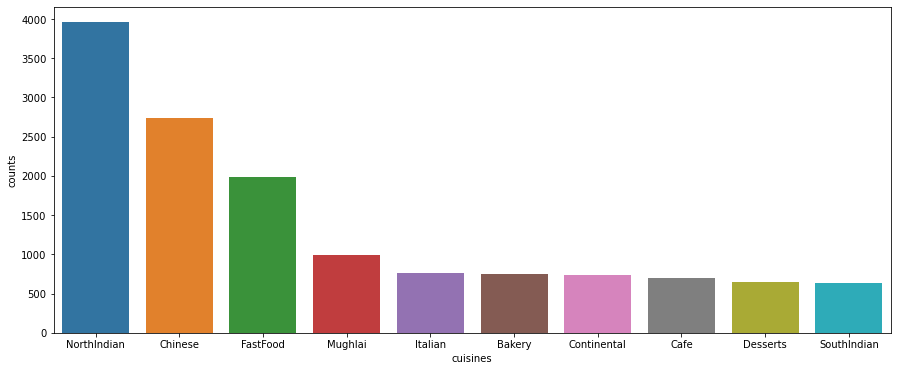

In [40]:
plt.subplots(figsize=(15, 6))
sns.barplot(x = 'cuisines', y = 'counts', data = Top10_cuis)


# Distribution cost across restaurants

In [41]:
# Restaurant wise distribution of cost
cost_perrest=pd.DataFrame(df.groupby('Restaurant_Name').agg(Count = ('Average_Cost_for_two','sum'))).reset_index()
cost_perrest=cost_perrest.rename(columns={"Count":"Average_Cost_for_two"})
cost_perrest

,Restaurant_Name,Average_Cost_for_two
0,12212,400
1,Let's Burrrp,400
2,#45,600
3,#Dilliwaala6,800
4,#InstaFreeze,300
...,...,...
7431,t Lounge by Dilmah,800
7432,tashas,320
7433,wagamama,70
7434,{Niche} - Cafe & Bar,1500


# Currencywise distribution of cost

In [42]:
currenc_dist=pd.DataFrame(df.groupby("Currency").Average_Cost_for_two.count()).reset_index()
currenc_dist.sort_values(by="Average_Cost_for_two", ascending=False)

,Currency,Average_Cost_for_two
4,Indian Rupees(Rs.),8651
2,Dollar($),473
7,Pounds(å£),80
1,Brazilian Real(R$),60
3,Emirati Diram(AED),60
9,Rand(R),60
6,NewZealand($),40
11,Turkish Lira(TL),34
0,Botswana Pula(P),22
5,Indonesian Rupiah(IDR),21


# Distribution of ratings 

In [43]:
Rating_cnt=pd.DataFrame(df.groupby("Aggregate_rating").agg(count=("Restaurant_Name","count"))).reset_index
Rating_cnt

<bound method DataFrame.reset_index of                   count
Aggregate_rating       
0.0                2148
1.8                   1
1.9                   2
2.0                   7
2.1                  15
2.2                  27
2.3                  47
2.4                  87
2.5                 110
2.6                 191
2.7                 250
2.8                 315
2.9                 381
3.0                 468
3.1                 519
3.2                 522
3.3                 483
3.4                 495
3.5                 480
3.6                 458
3.7                 427
3.8                 399
3.9                 332
4.0                 266
4.1                 273
4.2                 221
4.3                 174
4.4                 143
4.5                  95
4.6                  78
4.7                  41
4.8                  25
4.9                  61>

Above table shows that 61 restaurants has highest rating & 2148 restaurants have zero ratings

# Countrywise Rating count

In [44]:
country_rating_cnt=pd.DataFrame(df.groupby(["Country","Aggregate_rating"]).agg(Count=("Restaurant_Name",'count'))).reset_index()
country_rating_cnt.sort_values(by='Aggregate_rating', ascending=False)

,Country,Aggregate_rating,Count
221,United States,4.9,14
92,New Zealand,4.9,2
139,South Africa,4.9,3
151,Sri Lanka,4.9,1
32,Brazil,4.9,3
...,...,...,...
38,India,1.8,1
200,United States,0.0,3
12,Brazil,0.0,5
180,United Kingdom,0.0,1


# Country wise highest rated Restaurants

In [45]:
Country_wise_top_rating=pd.DataFrame(country_rating_cnt[country_rating_cnt.Aggregate_rating>=4.9]).reset_index()
Country_wise_top_rating.sort_values(by="Count", ascending=False)

,index,Country,Aggregate_rating,Count
1,69,India,4.9,19
11,221,United States,4.9,14
2,79,Indonesia,4.9,4
9,179,UAE,4.9,4
10,199,United Kingdom,4.9,4
0,32,Brazil,4.9,3
4,101,Phillipines,4.9,3
6,139,South Africa,4.9,3
8,163,Turkey,4.9,3
3,92,New Zealand,4.9,2


# Rating type distribution


In [46]:
Rating_type=pd.DataFrame(df.groupby("Rating_text").agg(Count=("Restaurant_Name",'count'))).reset_index()
Rating_type

,Rating_text,Count
0,Average,3734
1,Excellent,300
2,Good,2096
3,Not rated,2148
4,Poor,186
5,Very Good,1077


It indicates that only 301 restaurants have Excellent ratings

# Restaurants with Excellent Ratings across countries

In [47]:
cntry_ratingtype_cnt=pd.DataFrame(df.groupby(["Country","Rating_text"]).agg(Count=("Restaurant_Name",'count'))).reset_index()
cntry_rating_type=pd.DataFrame(cntry_ratingtype_cnt[cntry_ratingtype_cnt.Rating_text=='Excellent']).reset_index()
cntry_rating_type.sort_values(by='Count', ascending=False)

,index,Country,Rating_text,Count
2,14,India,Excellent,116
12,61,United States,Excellent,67
11,56,United Kingdom,Excellent,23
10,51,UAE,Excellent,18
1,6,Brazil,Excellent,16
4,23,New Zealand,Excellent,12
5,27,Phillipines,Excellent,12
7,38,South Africa,Excellent,12
9,47,Turkey,Excellent,10
3,20,Indonesia,Excellent,7


India has maximum restaurants with Excellent rating

In [48]:
#Creating a Dataframe to analyse the correlation between Ratings
Rating_relat=df[["Restaurant_ID","Restaurant_Name","City","Has_Table_booking","Has_Online_delivery","Aggregate_rating","Country","Price_range","Votes","Average_Cost_for_two"]]
colu=['Has_Table_booking','Has_Online_delivery']
Rating_relat=pd.get_dummies(Rating_relat,columns=colu, drop_first=True)
Rating_relat=Rating_relat.merge(resta_cuisines, left_on="Restaurant_Name", right_on="Restaurant_Name", how="left")
Rating_relat.head()

,Restaurant_ID,Restaurant_Name,City,Aggregate_rating,Country,Price_range,Votes,Average_Cost_for_two,Has_Table_booking_Yes,Has_Online_delivery_Yes,Cuisines,Rest_Count,Cuisines_Count
0,7402935,Skye,Jakarta,4.1,Indonesia,3,1498,800000,0,0,"[Italian, Continental]",1,2
1,7410290,Satoo - Hotel Shangri-La,Jakarta,4.6,Indonesia,3,873,800000,0,0,"[Asian, Indonesian, Western]",1,3
2,7420899,Sushi Masa,Jakarta,4.9,Indonesia,3,605,500000,0,0,"[Sushi, Japanese]",1,2
3,7421967,3 Wise Monkeys,Jakarta,4.2,Indonesia,3,395,450000,0,0,[Japanese],1,1
4,7422489,Avec Moi Restaurant and Bar,Jakarta,4.3,Indonesia,3,243,350000,0,0,"[French, Western]",1,2


# Correlation between "Rating" & "Average cost for two"

,Average_Cost_for_two,Aggregate_rating
Average_Cost_for_two,1.000000,0.048949
Aggregate_rating,0.048949,1.000000


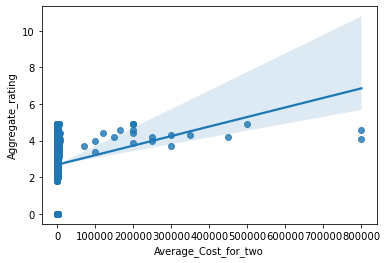

In [49]:
sns.regplot(x="Average_Cost_for_two", y="Aggregate_rating", data=Rating_relat)
Rating_relat[["Average_Cost_for_two", "Aggregate_rating"]].corr()

There is a poor correlation between Average cost for two & restaurant rating

# Correlation between " Rating" & " table booking"

C:\Users\ATA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Has_Table_booking', ylabel='Aggregate_rating'>

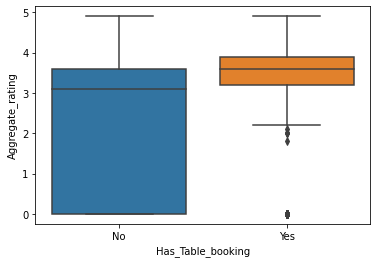

In [50]:
sns.boxplot(df["Has_Table_booking"],df["Aggregate_rating"])

Table booking has some impact on Rating

# Correlation between " Rating" & "online delivery"

,Has_Online_delivery_Yes,Aggregate_rating
Has_Online_delivery_Yes,1.00000,0.21156
Aggregate_rating,0.21156,1.00000


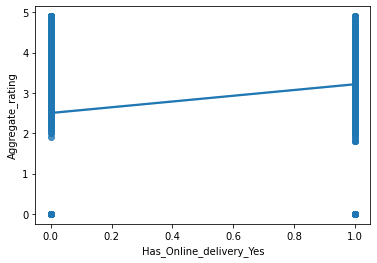

In [51]:
sns.regplot(x="Has_Online_delivery_Yes", y="Aggregate_rating", data=Rating_relat)
Rating_relat[["Has_Online_delivery_Yes", "Aggregate_rating"]].corr()

There is good positive relation between Rating & online delivery option.

# Correlation between "Rating" & "Price range"

,Price_range,Aggregate_rating
Price_range,1.00000,0.46319
Aggregate_rating,0.46319,1.00000


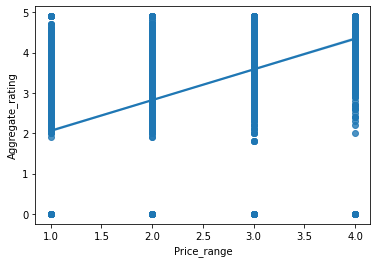

In [52]:
sns.regplot(x="Price_range", y="Aggregate_rating", data=Rating_relat)
Rating_relat[["Price_range", "Aggregate_rating"]].corr()

There is moderate positive correlation between Rating & price range. It can be deciding factor.

# Correlation between "Rating" & "Votes"

,Votes,Aggregate_rating
Votes,1.000000,0.317968
Aggregate_rating,0.317968,1.000000


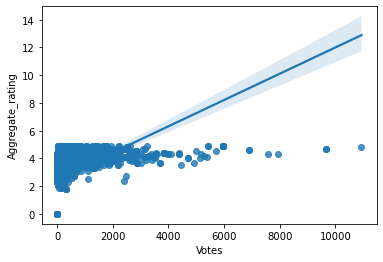

In [53]:
sns.regplot(x="Votes", y="Aggregate_rating", data=Rating_relat)
Rating_relat[["Votes", "Aggregate_rating"]].corr()

Votes can be a deciding factor for the rating of restaurant

# Correlation between "Rating" & "Cuisines count"

,Cuisines_Count,Aggregate_rating
Cuisines_Count,1.000000,0.232226
Aggregate_rating,0.232226,1.000000


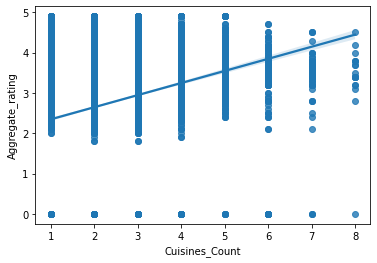

In [54]:
sns.regplot(x="Cuisines_Count", y="Aggregate_rating", data=Rating_relat)
Rating_relat[["Cuisines_Count", "Aggregate_rating"]].corr()

The relation between Rating & number of cuisines is poor.Hence number of cuisines cannot be the deciding factor for rating of restaurant